# Import modules

In [1]:
import torch
import os

import cv2
from google.colab.patches import cv2_imshow
import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import os
import pandas as pd
from glob import glob
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import h5py
import yaml

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Working on device= {device}')
print()
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print('torch: ',torch.__version__)


torch.set_printoptions(linewidth=120)

Working on device= cuda

Tesla K80
torch:  1.10.0+cu111


# Preparing Dataset

## Download image data from Bing

In [ ]:
!git clone https://github.com/ostrolucky/Bulk-Bing-Image-downloader.git

Cloning into 'Bulk-Bing-Image-downloader'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 188 (delta 4), reused 7 (delta 2), pack-reused 178
Receiving objects: 100% (188/188), 49.58 KiB | 9.92 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
!pwd

/content


In [ ]:
os.chdir('/content/Bulk-Bing-Image-downloader')
!pwd

/content/Bulk-Bing-Image-downloader


In [ ]:
!ls

bbid.py  LICENSE  README.md


In [ ]:
os.mkdir('animal_data')

In [41]:
animals_name_dict = {
                        'Sikorka_bogatka' : 'Parus major',
                        'Wrobel_domowy' : 'Passer domesticus',
                        'Rudzik' : 'Erithacus rubecula',
                        'Dzwoniec' : 'Chloris chloris',
                        'Dzieciol_duzy' : 'Dendrocopos major',
                        'Kwiczol' : 'Turdus pilaris',
                        'Sierpowka' : 'Streptopelia decaocto',
                        'Kos' : 'Turdus merula',
                        'Szpak' : 'Sturnus vulgaris',
                        'Raniuszek' : 'Aegithalos caudatus',
                        'sroka' : 'Eurasian Magpie', #??
                        'kawka' : 'Corvus monedula',
                        'wilga_zwyczajna' : 'Oriolus oriolus',
                        'dzik' : 'Sus scrofa',
                        'wiewiorka' : 'Sciurus vulgaris',
                        'sarna' : 'Capreolus capreolus',
                        'jelen_szlachetny' : 'Cervus elaphus',
                        }

animals_name_dict.values()

dict_values(['Parus major', 'Passer domesticus', 'Erithacus rubecula', 'Chloris chloris', 'Dendrocopos major', 'Turdus pilaris', 'Streptopelia decaocto', 'Turdus merula', 'Sturnus vulgaris', 'Aegithalos caudatus', 'Eurasian Magpie', 'Corvus monedula', 'Oriolus oriolus', 'Sus scrofa', 'Sciurus vulgaris', 'Capreolus capreolus', 'Cervus elaphus'])

In [42]:
labels = list( animals_name_dict.keys() )
labels

['Sikorka_bogatka',
 'Wrobel_domowy',
 'Rudzik',
 'Dzwoniec',
 'Dzieciol_duzy',
 'Kwiczol',
 'Sierpowka',
 'Kos',
 'Szpak',
 'Raniuszek',
 'sroka',
 'kawka',
 'wilga_zwyczajna',
 'dzik',
 'wiewiorka',
 'sarna',
 'jelen_szlachetny']

In [ ]:
os.chdir('/content')
!pwd

/content


In [ ]:
with open('label_names.txt', 'w') as f:
    for item in list( animals_name_dict.keys() ):
        f.write(str(item) + os.linesep)

In [ ]:
os.chdir('/content/Bulk-Bing-Image-downloader/animal_data')
!pwd

/content/Bulk-Bing-Image-downloader/animal_data


In [ ]:
%%time
for i, animal_name in enumerate( animals_name_dict.items() ):
    pol_name, lat_name = animal_name
    print(f'i, pol_name: {pol_name}, lat_name: {lat_name}')
    ! /content/Bulk-Bing-Image-downloader/bbid.py -s '$lat_name' -o '$pol_name' --limit 70
  

### Count images

In [4]:
def count_images(path_folder):

  class_names = os.listdir(path_folder)
  for no, cls_name in enumerate(class_names):
    
      path_to_class = os.path.join(path_folder, cls_name)
      imgs_count = os.listdir(path_to_class)
      
      print(f'class name: {cls_name} {len(imgs_count)} images')


In [ ]:
path_folder = '/content/Bulk-Bing-Image-downloader/animal_data'

count_images(path_folder)

class name: sroka 70 images
class name: Raniuszek 70 images
class name: Kwiczoł 70 images
class name: Dzwoniec 70 images
class name: Wróbel_domowy 70 images
class name: Rudzik 70 images
class name: Szpak 70 images
class name: Dzięcioł_duży 70 images
class name: Sierpówka 70 images
class name: Sikorka_bogatka 70 images
class name: kawka 70 images
class name: jeleń_szlachetny 70 images
class name: sarna 70 images
class name: Kos 70 images
class name: wilga_zwyczajna 70 images
class name: dzik 70 images
class name: wiewiórka 70 images


### Change file names

In [ ]:
def change_img_names(path_folder):
  class_names = os.listdir(path_folder)
  for no, cls_name in eos.rmdirnumerate(class_names):
      path_to_class = os.path.join(path_folder, cls_name)
      classes_list = os.listdir(path_to_class)

      for i, img in enumerate(classes_list): 
        old_path = os.path.join(path_folder, cls_name, img)
        new_path = os.path.join(path_folder, cls_name, cls_name+str(i) + '.jpg')
        os.rename(old_path, new_path) 

In [ ]:
%%time

change_img_names('/content/Bulk-Bing-Image-downloader/animal_data')

CPU times: user 7.05 ms, sys: 27.1 ms, total: 34.1 ms
Wall time: 37.5 ms


### Resize images

In [ ]:
def resize_images(path_folder):
    class_names = os.listdir(path_folder)
    
    height = 640
    # width = 640
  
    for no, cls_name in enumerate(class_names):
        path_to_class = os.path.join(path_folder, cls_name)
        classes_list = os.listdir(path_to_class)
        
        for i, img in enumerate(classes_list):
          path_to_img = os.path.join(path_to_class, img)
          image = cv2.imread( path_to_img )

          h, w = image.shape[:2]

          # Calculating the ratio
          ratio = height / w
            
          # Creating a tuple containing width and height
          dim = (height, int(h * ratio))

          resized_img = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
          cv2.imwrite(path_to_img, resized_img)

In [ ]:
resize_images(path_folder)

(426, 640, 3)


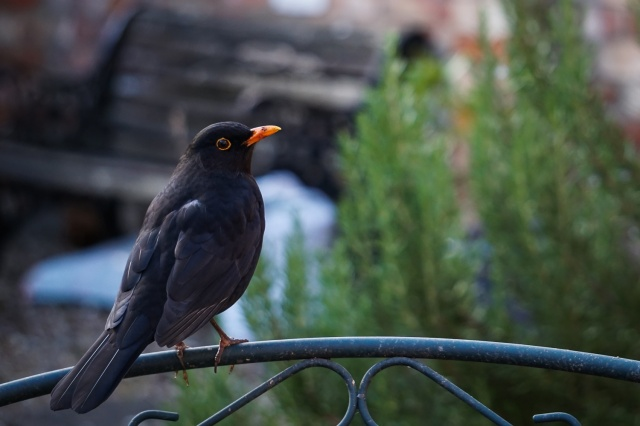

In [ ]:
img = cv2.imread('/content/Bulk-Bing-Image-downloader/animal_data/Kos/Kos28.jpg')
print(img.shape)
cv2_imshow(img)

### Create zip file

In [4]:
!pwd

/content


In [ ]:
os.chdir('/content')
!pwd

/content


In [ ]:
%%time

dir_name = '/content/Bulk-Bing-Image-downloader/animal_data'
output_filename = 'animal_data'

shutil.make_archive(output_filename, 'zip', dir_name)

CPU times: user 5.39 s, sys: 322 ms, total: 5.71 s
Wall time: 5.73 s


### Labeling data

In [ ]:
# https://www.makesense.ai/

# Preparing data for YOLO

## Unpacking dataset

In [5]:
def unpack_archive(archfile, target_dir):
  shutil.unpack_archive(
                        filename=archfile,
                        extract_dir=target_dir,
                        format='zip')

In [6]:
# the archive file
dataset_zip_file = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_animal_dataset.zip'

# Target directory
dataset_dir = "/content/animal_dataset"

unpack_archive(archfile=dataset_zip_file, target_dir=dataset_dir)

## Count images

In [7]:
animal_images = '/content/animal_dataset/animal_imgs'

count_images(animal_images)

class name: dzik 62 images
class name: Dzwoniec 67 images
class name: Szpak 68 images
class name: Raniuszek 68 images
class name: Kwiczoł 68 images
class name: Rudzik 70 images
class name: sroka 69 images
class name: sarna 70 images
class name: kawka 66 images
class name: wiewiórka 69 images
class name: Wróbel_domowy 66 images
class name: wilga_zwyczajna 69 images
class name: Sierpówka 68 images
class name: Kos 68 images
class name: Dzięcioł_duży 70 images
class name: jeleń_szlachetny 64 images
class name: Sikorka_bogatka 65 images


In [8]:
cls_dir_list = os.listdir('/content/animal_dataset/animal_imgs')
cls_dir_list 

['dzik',
 'Dzwoniec',
 'Szpak',
 'Raniuszek',
 'Kwiczoł',
 'Rudzik',
 'sroka',
 'sarna',
 'kawka',
 'wiewiórka',
 'Wróbel_domowy',
 'wilga_zwyczajna',
 'Sierpówka',
 'Kos',
 'Dzięcioł_duży',
 'jeleń_szlachetny',
 'Sikorka_bogatka']

In [11]:
def move_data_to_shared_folder(path_to_folder):
  cls_dir_list = os.listdir(path_to_folder)

  for cls_name in cls_dir_list:
    imgs_path = os.path.join(path_to_folder, cls_name)
    images_list = os.listdir( imgs_path )
    
    for img in images_list:
      img_src = os.path.join(imgs_path, img)
      shutil.move(src=img_src, dst=path_to_folder)

In [12]:
path_to_folder = '/content/animal_dataset/animal_imgs'

move_data_to_shared_folder(path_to_folder)

In [15]:
len(os.listdir(path_to_folder))

1147

In [14]:
for label in cls_dir_list:
  path_to_delete = os.path.join(path_to_folder, label)
  shutil.rmtree(path_to_delete)

In [16]:
os.chdir('/content/animal_dataset')
!pwd

/content/animal_dataset


In [17]:
os.mkdir('yolo_labels')

## Unpack labels

In [18]:
archfile= '/content/animal_dataset/labels/labels_animal_detection_yolo_format.zip'
target_dir= '/content/animal_dataset/yolo_labels'

unpack_archive(archfile, target_dir)

In [19]:
len(os.listdir('/content/animal_dataset/yolo_labels' ))

1147

## Download YoloV5

In [20]:
!pwd

/content/animal_dataset


In [21]:
os.mkdir('/content/working/')

os.chdir('/content/working/')
!pwd

/content/working


In [22]:
# # clone repo
!git clone https://github.com/ultralytics/yolov5.git 

# # change the working directory to yolov5 
# #%cd yolov5
os.chdir('/content/working/yolov5') 

# # install dependencies
%pip install -qr requirements.txt 

# # Change the working directory back
os.chdir('/content/working/')

# 1fab18 - green

Cloning into 'yolov5'...
remote: Enumerating objects: 10843, done.
remote: Total 10843 (delta 0), reused 0 (delta 0), pack-reused 10843
Receiving objects: 100% (10843/10843), 10.87 MiB | 12.79 MiB/s, done.
Resolving deltas: 100% (7498/7498), done.
     |████████████████████████████████| 596 kB 4.3 MB/s 


In [23]:
%pip install -q wandb
!wandb disabled

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 143 kB 35.4 MB/s 
     |████████████████████████████████| 180 kB 45.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
W&B disabled.


## Create train, val, test folders

In [24]:
os.chdir('/content/working/yolov5/data')

!pwd

/content/working/yolov5/data


In [25]:
# base_dir
    # images
        # train
        # validation
        # test
    # labels
        # train
        # validation
        # test


base_dir = 'animal_detection'
os.mkdir(base_dir)

# images
images = os.path.join(base_dir, 'images')
os.mkdir(images)

# labels
labels = os.path.join(base_dir, 'labels')
os.mkdir(labels)


# create new folders inside images
train = os.path.join(images, 'train')
os.mkdir(train)
validation = os.path.join(images, 'val')
os.mkdir(validation)
test = os.path.join(images, 'test')
os.mkdir(test)

# create new folders inside labels
train = os.path.join(labels, 'train')
os.mkdir(train)
validation = os.path.join(labels, 'val')
os.mkdir(validation)
test = os.path.join(labels, 'test')
os.mkdir(test)

In [26]:
!pwd
print()
!ls

/content/working/yolov5/data

animal_detection  GlobalWheat2020.yaml	scripts        xView.yaml
Argoverse.yaml	  hyps			SKU-110K.yaml
coco128.yaml	  images		VisDrone.yaml
coco.yaml	  Objects365.yaml	VOC.yaml


## Generate image names list

In [28]:
images = [ x for x in os.listdir('/content/animal_dataset/animal_imgs') ] 
annotations  = [ x for x in os.listdir('/content/animal_dataset/yolo_labels') ]

images.sort()
annotations.sort()

print(f'images: {len(images)} | annotations: {len(annotations)}') 

images: 1147 | annotations: 1147


In [ ]:
# os.rmdir('/content/animal_dataset/animal_imgs/.ipynb_checkpoints')

## Split data to train, val, test

In [31]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size=0.2, random_state=1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size=0.1, random_state=1)


print(f'Train images: {len(train_images)}' )
print(f'Val images: {len(val_images)}' )
print(f'Test images: {len(test_images)}' )
print()
print(f'Train annotations: {len(train_annotations)}' )
print(f'Val annotations: {len(val_annotations)}' )
print(f'Test annotations: {len(test_annotations)}' )

Train images: 917
Val images: 207
Test images: 23

Train annotations: 917
Val annotations: 207
Test annotations: 23


## Move files to specific folders

In [32]:
 def move_files_to_folder(data_list, src_path, dst_path):
  for item in data_list:
    shutil.move(os.path.join(src_path, item), dst_path)

In [33]:
img_train_dir= '/content/working/yolov5/data/animal_detection/images/train'
img_val_dir= '/content/working/yolov5/data/animal_detection/images/val'
img_test_dir= '/content/working/yolov5/data/animal_detection/images/test'

label_train_dir= '/content/working/yolov5/data/animal_detection/labels/train'
label_val_dir = '/content/working/yolov5/data/animal_detection/labels/val'
label_test_dir= '/content/working/yolov5/data/animal_detection/labels/test'


move_files_to_folder(train_images, '/content/animal_dataset/animal_imgs', img_train_dir)
move_files_to_folder(val_images, '/content/animal_dataset/animal_imgs', img_val_dir)
move_files_to_folder(test_images, '/content/animal_dataset/animal_imgs', img_test_dir)

move_files_to_folder(train_annotations, '/content/animal_dataset/yolo_labels', label_train_dir)
move_files_to_folder(val_annotations, '/content/animal_dataset/yolo_labels', label_val_dir)
move_files_to_folder(test_annotations, '/content/animal_dataset/yolo_labels', label_test_dir)


In [34]:
print(f'Train images: {len( os.listdir(img_train_dir) )}    Train annotations: {len( os.listdir(label_train_dir))}')
print(f'Val images:   {len( os.listdir(img_val_dir) )}    Val annotations:   {len( os.listdir(label_val_dir) )}')
print(f'Test images:  {len( os.listdir(img_test_dir) )}      Test images:      {len( os.listdir(label_test_dir) )}')

Train images: 917    Train annotations: 917
Val images:   207    Val annotations:   207
Test images:  23      Test images:      23


## Create the data config file

In [35]:
os.chdir('/content/working')

!pwd

/content/working


In [38]:
labels

['Sikorka_bogatka',
 'Wrobel_domowy',
 'Rudzik',
 'Dzwoniec',
 'Dzięciol_duzy',
 'Kwiczol',
 'Sierpowka',
 'Kos',
 'Szpak',
 'Raniuszek',
 'sroka',
 'kawka',
 'wilga_zwyczajna',
 'dzik',
 'wiewiorka',
 'sarna',
 'jelen_szlachetny']

In [43]:
yaml_dict = {
            'train': img_train_dir,              # path to the img train folder
            'val': img_val_dir,                  # path to the val folder
            'test': img_test_dir,
            'nc': 17,                             # number of classes
            'names': labels                    # list of label names
            }



with open(r'yolov5/data/animal_detection.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)              

In [44]:
!cat 'yolov5/data/animal_detection.yaml'

names: [Sikorka_bogatka, Wrobel_domowy, Rudzik, Dzwoniec, Dzieciol_duzy, Kwiczol,
  Sierpowka, Kos, Szpak, Raniuszek, sroka, kawka, wilga_zwyczajna, dzik, wiewiorka,
  sarna, jelen_szlachetny]
nc: 17
test: /content/working/yolov5/data/animal_detection/images/test
train: /content/working/yolov5/data/animal_detection/images/train
val: /content/working/yolov5/data/animal_detection/images/val


## Training data

In [45]:
os.chdir('/content/working/yolov5') 

!pwd

/content/working/yolov5


In [47]:
!python train.py --img 640 --batch 16 --epochs 50 --data animal_detection.yaml --weights yolov5s.pt --name animal_det_b16e50 --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov5s.pt, cfg=, data=animal_detection.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=animal_det_b16e50, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-232-g079b36d torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005

## Test model on test dataset

In [48]:
!python detect.py --source '/content/working/yolov5/data/animal_detection/images/test' --weights runs/train/animal_det_b16e50/weights/best.pt --conf 0.25 --name animal_det_b16e50 --line-thickness 1

detect: weights=['runs/train/animal_det_b16e50/weights/best.pt'], source=/content/working/yolov5/data/animal_detection/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b16e50, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-232-g079b36d torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
image 1/23 /content/working/yolov5/data/animal_detection/images/test/Dzięcioł_duży18.jpg: 480x640 1 Dzieciol_duzy, Done. (0.030s)
image 2/23 /content/working/yolov5/data/animal_detection/images/test/Dzięcioł_duży68.jpg: 640x544 1 Dzieciol_duzy, Done. (0.031s)
image 3/23 /content/working/yolov5/data/animal_

In [49]:
# get a list of detect experiments
exp_list = os.listdir('runs/detect/')


detect_exp = exp_list

detect_exp

['animal_det_b16e50']

In [51]:
cols = 4
rows = 6
i = 1

pred_list = os.listdir(f'runs/detect/{detect_exp[0]}')

image_name = pred_list[0]


fig = plt.figure(figsize=(23,25) )

for img in pred_list:
  fig.add_subplot(rows, cols, i) 

  path = f'runs/detect/{detect_exp[0]}/' + img
  image = plt.imread(path)

  plt.imshow(image)
  plt.grid(visible=False)
  plt.axis('off')
  fig.tight_layout()
  plt.title( img )
  i += 1

Output hidden; open in https://colab.research.google.com to view.

In [52]:
dir_name = '/content/working/yolov5/runs'
output_filename = 'animal_det_b16e50_yolov5'

shutil.make_archive(output_filename, 'zip', dir_name)

'/content/working/yolov5/animal_det_b16e50_yolov5.zip'